In [215]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import ticker
import datetime as dt
import netCDF4 as nc

In [216]:
fcable = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_jim_dushan/outputs/EucFACE_ele_out.nc"

In [217]:
cable = nc.Dataset(fcable, 'r')

In [218]:
step_2_sec = 30.*60.

In [219]:
df              = pd.DataFrame(cable.variables['Rainf'][:,0], columns=['Rainf']) # 'Rainfall+snowfall'
df['Evap']      = cable.variables['Evap'][:,0]   # 'Total evaporation'
df['TVeg']      = cable.variables['TVeg'][:,0]   # 'Vegetation transpiration'
df['ESoil']     = cable.variables['ESoil'][:,0]  # 'evaporation from soil'
df['ECanop']    = cable.variables['ECanop'][:,0] # 'Wet canopy evaporation'
df['Qs']        = cable.variables['Qs'][:,0]     # 'Surface runoff'
df['Qsb']       = cable.variables['Qsb'][:,0]    # 'Subsurface runoff'
df['Qrecharge'] = cable.variables['Qrecharge'][:,0] 
df['dates']     = nc.num2date(cable.variables['time'][:],cable.variables['time'].units)
df              = df.set_index('dates')

In [220]:
df              = df*step_2_sec
df              = df.resample("M").agg('sum')
df              = df.drop(df.index[len(df)-1])
df.index        = df.index.strftime('%Y-%m-%d')
#turn DatetimeIndex into the formatted strings specified by date_format

In [221]:
df['Season']    = np.zeros(len(df))
df['Year']      = np.zeros(len(df))
for i in np.arange(0,len(df),1):
    df['Year'][i] = df.index[i][0:4]
    if df.index[i][5:7] in ['01','02','12']:
        df['Season'][i] = 1
    elif df.index[i][5:7] in ['03','04','05']:
        df['Season'][i] = 2
    elif df.index[i][5:7] in ['06','07','08']:
        df['Season'][i] = 3
    elif df.index[i][5:7] in ['09','10','11']:
        df['Season'][i] = 4
df['Year'][0:-1] = df['Year'][1:]

/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/short/w35/mm3972/anaconda3/en

In [222]:
df = df.groupby(by=['Year','Season']).sum()
df

Rainf        Evap        TVeg       ESoil     ECanop  \
Year   Season                                                              
2013.0 1.0     366.000000  219.919067   73.668129  133.845581  12.405357   
       2.0     160.199997  209.890686   95.245071  104.458725  10.186893   
       3.0      86.199997  123.309654   48.439713   67.489937   7.380004   
       4.0     243.199997  205.472794   83.417496  113.921989   8.133305   
2014.0 1.0     100.599998  199.642456  126.535110   60.192570  12.914782   
       2.0     138.800003  191.035675   98.596397   79.567177  12.872092   
       3.0     128.800003  136.668304   55.039444   69.275856  12.353010   
       4.0     102.599998  155.335999   80.870308   68.149490   6.316189   
2015.0 1.0     439.399994  378.364014  119.019981  240.437805  18.906239   
       2.0     409.400024  252.389679   69.966011  162.011429  20.412226   
       3.0     107.199997  145.120895   44.107994   94.034874   6.978022   
       4.0     205.400009  208.578751   87.412628  110.527283  10.638828   
2016.0 1.0     499.200012  439.324280  199.598480  216.517578  23.208223   
       2.0      37.599998  149.217819  106.823845   36.117821   6.276157   
       3.0     331.200012  207.265564   54.456436  138.499573  14.309545   
       4.0      94.400002  186.280823  106.959198   71.831070   7.490560   

                         Qs  Qsb  Qrecharge  
Year   Season                                
2013.0 1.0     1.171684e+01  0.0        0.0  
       2.0     3.272143e-07  0.0        0.0  
       3.0     2.639846e-08  0.0        0.0  
       4.0     1.063313e-06  0.0        0.0  
2014.0 1.0     0.000000e+00  0.0        0.0  
       2.0     5.592082e-07  0.0        0.0  
       3.0     6.255171e-08  0.0        0.0  
       4.0     9.748116e-08  0.0        0.0  
2015.0 1.0     2.422911e-06  0.0        0.0  
       2.0     1.284178e+01  0.0        0.0  
       3.0     3.601423e-07  0.0        0.0  
       4.0     1.020415e-06  0.0        0.0  
2016.0 1.0     6.549534e+00  0.0        0.0  
       2.0     0.000000e+00  0.0        0.0  
       3.0     1.153684e+01  0.0        0.0  
       4.0     1.637458e-07  0.0        0.0

In [223]:
df_SM              = pd.DataFrame(cable.variables['SoilMoist'][:,0,0], columns=['SoilMoist']) 
df_SM['SoilMoist'] =   cable.variables['SoilMoist'][:,0,0]*22.  \
                     + cable.variables['SoilMoist'][:,1,0]*58.  \
                     + cable.variables['SoilMoist'][:,2,0]*154. \
                     + cable.variables['SoilMoist'][:,3,0]*409. \
                     + cable.variables['SoilMoist'][:,4,0]*1085.\
                     + cable.variables['SoilMoist'][:,5,0]*2872. 
df_SM['SoilMoist_up'] = cable.variables['SoilMoist'][:,0,0]*22.  \
                      + cable.variables['SoilMoist'][:,1,0]*58.  \
                      + cable.variables['SoilMoist'][:,2,0]*154. 
df_SM['SoilMoist_lw'] = cable.variables['SoilMoist'][:,3,0]*409. \
                      + cable.variables['SoilMoist'][:,4,0]*1085.\
                      + cable.variables['SoilMoist'][:,5,0]*2872. 
df_SM['dates']    = nc.num2date(cable.variables['time'][:],cable.variables['time'].units)
df_SM             = df_SM.set_index('dates')
df_SM_index       = df_SM.index.strftime('%Y-%m-%d %H:%M')

In [224]:
# daily soil water content and daily changes
df_SM_laststep         = df_SM.resample("D").agg('mean')
df_SM_laststep.iloc[0] = df_SM.iloc[0]
j = 1
for i in np.arange(0,len(df_SM),1):
    if df_SM_index[i][11:16] == '00:00':
        df_SM.iloc[i]
        df_SM_laststep.iloc[j] = df_SM.iloc[i]
        j       += 1
        
df_SM_chg = pd.DataFrame((df_SM_laststep.iloc[1:].values - df_SM_laststep.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_chg['dates'] = df_SM_laststep.index[0:-1]
df_SM_chg          = df_SM_chg.set_index('dates')

In [230]:
# monthly soil water content and monthly changes
df_SM_mth_laststep         = df_SM.resample("M").agg('mean')
df_SM_mth_laststep.iloc[0] = df_SM.iloc[0]
j = 1
for i in np.arange(0,len(df_SM),1):
    if df_SM.index.is_month_start[i] and df_SM_index[i][11:16] == '00:00':
        df_SM_mth_laststep.iloc[j] = df_SM.iloc[i]
        j       += 1
df_SM_mth_chg = pd.DataFrame((df_SM_mth_laststep.iloc[1:].values - df_SM_mth_laststep.iloc[0:-1].values), \
                          columns=['SoilMoist','SoilMoist_up','SoilMoist_lw']) 
df_SM_mth_chg['dates'] = df_SM_mth_laststep.index[0:-1]
df_SM_mth_chg          = df_SM_mth_chg.set_index('dates')
df_SM_mth_chg

,SoilMoist,SoilMoist_up,SoilMoist_lw
dates,,,
2013-01-31,77.213318,22.019974,55.193359
2013-02-28,57.812256,12.747665,45.064514
2013-03-31,-24.284790,-31.842270,7.557495
2013-04-30,-13.865845,0.849220,-14.714966
2013-05-31,-12.203369,1.578743,-13.782104
2013-06-30,16.651123,13.805763,2.845276
2013-07-31,-29.809326,-19.673325,-10.135986
2013-08-31,-23.948425,-4.718838,-19.229553
2013-09-30,-15.968445,1.474773,-17.443237


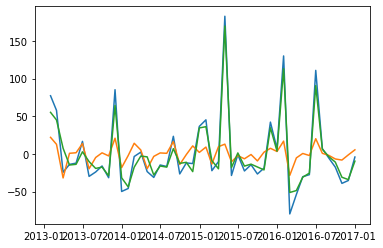

In [229]:
plt.plot(df_SM_mth_chg)

In [157]:
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()